In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [2]:
df = pd.read_csv("../data/cleaned-premier-label.csv")

In [3]:
df.shape

(1246, 18)

In [4]:
df.head()

,date,season,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result,home_season_wins_so_far,home_season_draws_so_far,home_season_losses_so_far,away_season_wins_so_far,away_season_draws_so_far,away_season_losses_so_far
0,2015-08-08,2015/2016,Bournemouth,Aston Villa,0,7.024,3.303,3.748,18,17,0,0,0,0,0,0,0,0
1,2015-08-08,2015/2016,Chelsea,Swansea,1,6.697,4.338,8.967,1,8,0,0,0,0,0,0,0,0
2,2015-08-08,2015/2016,Everton,Watford,1,6.842,3.514,4.852,11,19,0,0,0,0,0,0,0,0
3,2015-08-08,2015/2016,Leicester,Sunderland,2,7.000,3.207,3.742,14,16,0,0,0,0,0,0,0,0
4,2015-08-08,2015/2016,Man United,Tottenham,2,6.477,3.651,5.318,4,5,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1246 non-null   object 
 1   season                     1246 non-null   object 
 2   home_team                  1246 non-null   object 
 3   away_team                  1246 non-null   object 
 4   home_outcome               1246 non-null   int64  
 5   avg_odd_home_win           1246 non-null   float64
 6   avg_odd_draw               1246 non-null   float64
 7   avg_odd_away_win           1246 non-null   float64
 8   home_ranking               1246 non-null   int64  
 9   away_ranking               1246 non-null   int64  
 10  last_home_result           1246 non-null   int64  
 11  last_away_result           1246 non-null   int64  
 12  home_season_wins_so_far    1246 non-null   int64  
 13  home_season_draws_so_far   1246 non-null   int64

In [6]:
df.describe()

,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result,home_season_wins_so_far,home_season_draws_so_far,home_season_losses_so_far,away_season_wins_so_far,away_season_draws_so_far,away_season_losses_so_far
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,1.133226,7.274838,4.441469,3.684693,11.113162,10.462279,-0.089888,0.072231,5.401284,4.509631,5.774478,5.521669,4.478331,5.555377
std,0.851120,1.043937,1.647506,1.604586,5.540870,5.692081,0.851143,0.860326,4.181174,2.974238,4.374224,4.220710,3.025848,4.431330
min,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,-1.000000,-1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,0.000000,0.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
75%,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,1.000000,1.000000,8.000000,6.000000,9.000000,8.000000,6.000000,9.000000
max,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,1.000000,1.000000,20.000000,15.000000,21.000000,20.000000,15.000000,21.000000


In [7]:
df['ranking_diff'] = df['home_ranking']-df['away_ranking']

In [8]:
wins_df = df[df['home_outcome'] ==2]

In [9]:
print('home_total_wins_so_far' in df.columns)

False


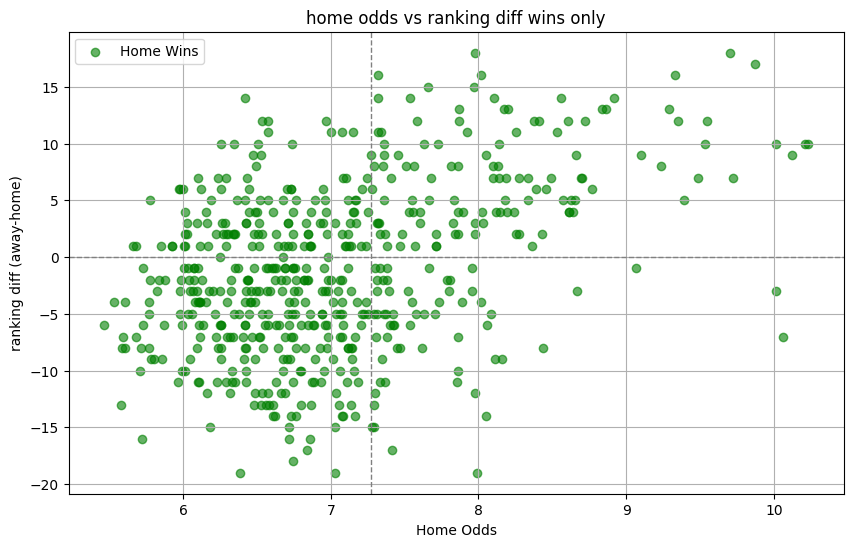

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(wins_df['avg_odd_home_win'],wins_df['ranking_diff'],
            c='green',alpha=0.6,label='Home Wins')
plt.xlabel('Home Odds')
plt.ylabel('ranking diff (away-home)')
plt.title('home odds vs ranking diff wins only')
plt.axhline(0,color='grey',linestyle='--',linewidth=1)
plt.axvline(df['avg_odd_home_win'].mean(),color='grey',linestyle='--',linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

As we can see on this graph despite the ranking difference per away team compared to the home team,The home team have a better change at winning according to the odds than the higher ranking away team

In [11]:
y = df['home_outcome']
X = df[['ranking_diff','avg_odd_home_win','avg_odd_draw','avg_odd_away_win','home_season_wins_so_far','home_season_draws_so_far','home_season_losses_so_far','away_season_wins_so_far','away_season_draws_so_far' ]]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(996, 9)
(996,)
(250, 9)
(250,)


In [14]:
forestclassification = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
forestclassification.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [15]:
y_pred = forestclassification.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.49      0.51        89
           1       0.41      0.22      0.29        63
           2       0.51      0.68      0.58        98

    accuracy                           0.50       250
   macro avg       0.48      0.47      0.46       250
weighted avg       0.49      0.50      0.48       250

[[44  9 36]
 [20 14 29]
 [20 11 67]]
accuracy: 0.5


precission is how accurate in percentage the model was at guessing certain outcomes ie 0 = a team losing it have an accuracy of 56% of. 
the overarching accuracy of the entire model is 48%

the matrix works as following taking the first row,39 nine was placed correctly in the loss,14 was wrongly calculated in draw and 36 was wrongly placed in win repeat per row

In [17]:
importances = forestclassification.feature_importances_
indices = np.argsort(importances)[::-1]

the code is modified from here: https://www.geeksforgeeks.org/interpreting-random-forest-classification-results/

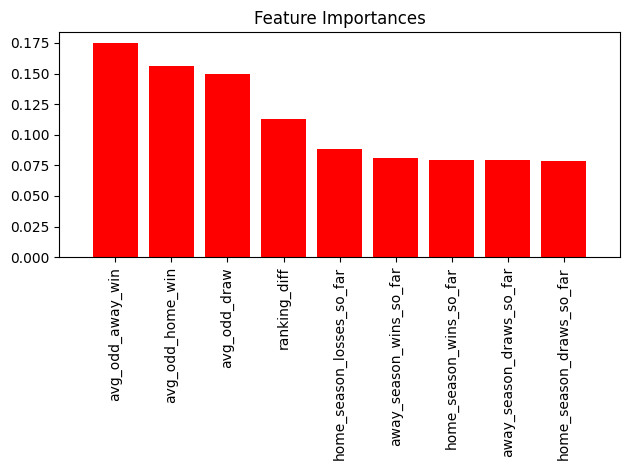

In [18]:
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]),importances[indices],color="r", align="center")
plt.xticks(range(X.shape[1]),[X.columns[i] for i in indices],rotation=90)
plt.xlim([-1,X.shape[1]])
plt.tight_layout()
plt.show()

In [19]:
model_file = '../Models/myrandomforest.pkl'

joblib.dump(forestclassification,model_file)

['../Models/myrandomforest.pkl']

In [20]:
load_model = joblib.load(model_file)
y_predict = load_model.predict(X_test)

Which machine learning method did you choose to apply in the application and why?
The model I ended up implementing was Random Forest instead of Linear Regression because it could accurately handle multiple outcomes instead of just the singular output from the Linear Regression, and it was also much, much more accurate than Linear Regression (as accurate as possible with the available data).

How accurate is your solution of prediction and explain the meaning of the quality measured.
The current accuracy is around 46% (it changes sometimes when recompiled for example at last run all it's at 50%). The model is around 50% percent chance at calculating if a team wins or loses but horrible at predicting draws at only 26% chance. The model based on the matrix is so far best at predicting away wins (note: this changed a bit when I was forced to reinstall NumPy).

What could be done for further improvement of the accuracy of the model?
More data than is currently available in the set we have right now. If there were also data on player statistics to the economy of the individual clubs, to name a few, it could help. Logically, on paper, Tottenham with a greater economy than Portsmouth should make it much more likely for Tottenham to purchase better players and therefore have a greater chance of winning than Portsmouth with a low economy.